## Inverted Pendulum
## Rex McArthur

In [1]:
from __future__ import division,print_function
import numpy as np
from scipy.optimize import root
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
from matplotlib import pyplot as plt

### Problem 1, 2

In [2]:
def linearized_init(M, m, l, q1, q2, q3, q4, r,g=9.8):
    '''
    Parameters:
    ----------
    M, m: floats
    masses of the rickshaw and the present
    l : float
    length of the rod
    q1, q2, q3, q4, r : floats
    relative weights of the position and velocity of the rickshaw,
    the
    angular displacement theta and the change in theta, and the
    control
    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    A = np.array([[0,1,0,0],
                  [0,0,m*g/M,0],
                  [0,0,0,1],
                  [0,0,g/(M*l)*(M+m),0]])
    B = np.array([0,1/M,0,1/(M*l)]).reshape((4,1))
    
    Q = np.diag([q1,q2,q3,q4])
    R= np.array([r]).reshape((1,1))
    
    return A,B,Q,R


def find_P(A, B, Q, R):
    '''
    Parameters:
    ----------
    A, Q : ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    Returns
    -------
    P : the matrix solution of the Riccati equation
    '''
    def zeros(P):
        P = P.reshape((4,4))
        val = P.dot(A) + A.T.dot(P) + Q - P.dot(B).dot(np.linalg.inv(R)).dot(B.T).dot(P)
        val = val.reshape(16)
        return val
    
    P_init = np.ones(16) * .1
    sol = root(zeros,P_init)
    return sol.x.reshape((4,4))

M,m,l,q1,q2,q3,q4,r = 23, 5, 4,1,1,1,1,5
A,B,Q,R = linearized_init(M,m,l,q1,q2,q3,q4,r)
P = find_P(A,B,Q,R)

e_val, e_vec = np.linalg.eig(A - \
                    B.dot(np.linalg.inv(R).dot(B.T.dot(P))))
print('Eigen Values: ', e_val)

Eigen Values:  [-1.72812266+0.j         -0.05988183+0.05894933j -0.05988183-0.05894933j
  1.72593851+0.j        ]


Note, since there is a positive real value, it is unstable and will diverge. Thus z does not tend to zero

# Problem 3

In [3]:
def rickshaw(tv, Z0, A, B, Q, R, P):
    '''
    Parameters:
    ----------
    tv : ndarray of time values, with shape (n+1,)
    Z0 : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    P : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    '''
    def func(z,t):
        return (A - B.dot(np.linalg.inv(R).dot(B.T).dot(P))).dot(z) 
    
    y = odeint(func,Z0,tv)
    return y

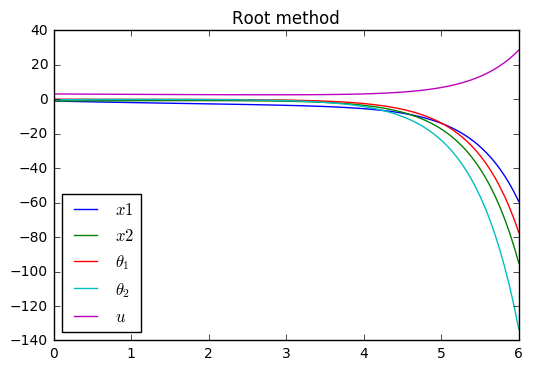

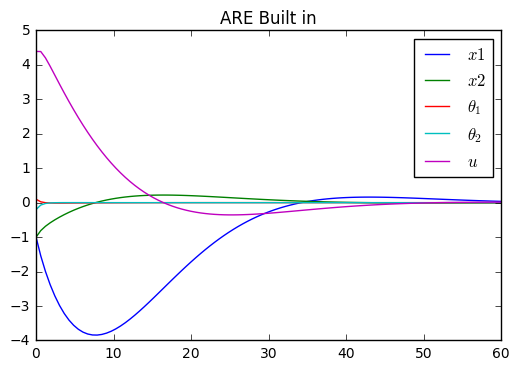

In [7]:
n=100
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf = 6
tv = np.linspace(0,tf,n)
Z0 = np.array([-1, -1, .1, -.2])

# Using optimize.root
P_root = find_P(A,B,Q,R)

z = rickshaw(tv,Z0, A, B, Q, R, P_root)
u = -1 * (np.linalg.inv(R).dot(B.T).dot(P_root))
u = u.dot(z.T)
plt.title('Root method')
plt.plot(tv, z)
plt.plot(tv,u.T)
plt.legend([r'$x1$', r'$x2$', r'$\theta_1$', r'$\theta_2$', r'$u$'], loc='best')
plt.show()





tf = 60
tv = np.linspace(0,tf,n)
def plot_are(tf, n, M, m, l, q1,q2,q3,q4,r,Z0):
    # Using continous ARE
    P_are = solve_continuous_are(A,B,Q,R)

    z = rickshaw(tv, Z0, A, B, Q, R, P_are)
    u = -1 * (np.linalg.inv(R).dot(B.T).dot(P_are))
    u = u.dot(z.T)

    plt.title('ARE Built in')
    plt.plot(tv,z)
    plt.plot(tv,u.T)
    plt.legend([r'$x1$', r'$x2$', r'$\theta_1$', r'$\theta_2$', r'$u$'], loc='best')
    plt.show()
plot_are(60, 100, M,m, l, q1,q2,q3,q4,r,Z0)

### Problem 5

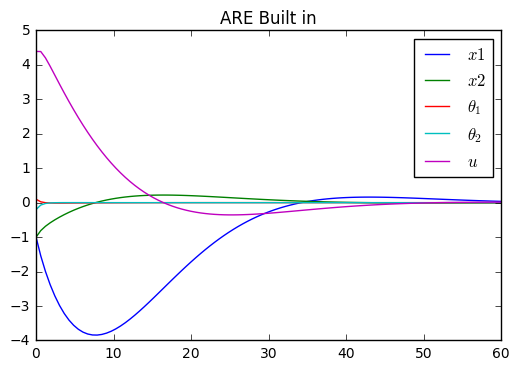

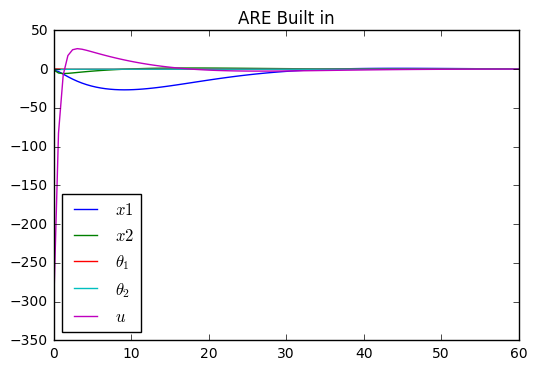

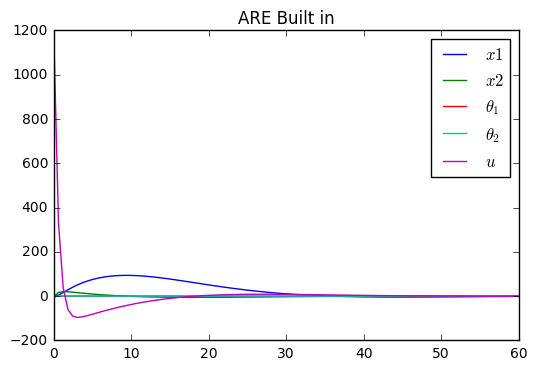

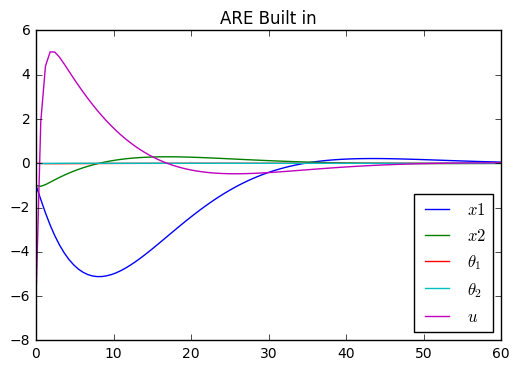

In [13]:
tf=60
n = 100
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf = 60

Z0 = np.array([-1, -1, .1, -.2])
plot_are(tf, n, M, m, l, q1,q2,q3,q4,r,Z0)



Z0 = np.array([-1, -1, .6, -.2])
plot_are(tf, n, M, m, l, q1,q2,q3,q4,r,Z0)



Z0 = np.array([-1, -1, .4, -4])
plot_are(tf, n, M, m, l, q1,q2,q3,q4,r,Z0)


Z0 = np.array([-1, -1, .0001, .00001])
plot_are(tf, n, M, m, l, q1,q2,q3,q4,r,Z0)

Basically, it's clear that the smaller theta 1 and theta 2 are, the more stable the control is. That makes sense. If you're angular momentum is too high, your control has to compensate for that a lot right off the bat. Smaller of both makes it easier for controls to do their thing.
